# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_1 = sinasc_raw[['SEMAGESTAC','CONSULTAS','munResLat']]
sinasc_1.head()

,SEMAGESTAC,CONSULTAS,munResLat
0,39.0,4,-11.93554
1,38.0,4,-11.93554
2,40.0,4,-11.93554
3,38.0,3,-12.13178
4,38.0,4,-11.93554


In [5]:
lat_mun = pd.cut(sinasc_1['munResLat'], [-20, -10.5, 0])
lat_mun

0        (-20.0, -10.5]
1        (-20.0, -10.5]
2        (-20.0, -10.5]
3        (-20.0, -10.5]
4        (-20.0, -10.5]
              ...      
27023    (-20.0, -10.5]
27024    (-20.0, -10.5]
27025    (-20.0, -10.5]
27026    (-20.0, -10.5]
27027    (-20.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-20.0, -10.5] < (-10.5, 0.0]]

In [6]:
sinasc_1['lat_mun'] = lat_mun

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1427085320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['lat_mun'] = lat_mun


In [7]:
sinasc_1.head()

,SEMAGESTAC,CONSULTAS,munResLat,lat_mun
0,39.0,4,-11.93554,"(-20.0, -10.5]"
1,38.0,4,-11.93554,"(-20.0, -10.5]"
2,40.0,4,-11.93554,"(-20.0, -10.5]"
3,38.0,3,-12.13178,"(-20.0, -10.5]"
4,38.0,4,-11.93554,"(-20.0, -10.5]"


In [8]:
resultado_1 =  sinasc_1.groupby('lat_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\3481370139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultado_1 =  sinasc_1.groupby('lat_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


In [9]:
resultado_1

SEMAGESTAC                                                   \
                     mean median       sum   min   max       std       var   
lat_mun                                                                      
(-20.0, -10.5]  38.545360   39.0  482665.0  19.0  45.0  2.012435  4.049895   
(-10.5, 0.0]    38.588302   39.0  511951.0  21.0  45.0  2.020722  4.083319   

               CONSULTAS                                            
                    mean median    sum min max       std       var  
lat_mun                                                             
(-20.0, -10.5]  3.694297    4.0  48000   1   9  0.643372  0.413928  
(-10.5, 0.0]    3.467436    4.0  48662   1   9  0.888240  0.788970

UTILIZANDO O PIVOT TABLE:

In [10]:
sinasc_1.pivot_table('SEMAGESTAC', ['CONSULTAS', lat_mun])

SEMAGESTAC
CONSULTAS munResLat                 
1         (-20.0, -10.5]   36.942308
          (-10.5, 0.0]     38.225455
2         (-20.0, -10.5]   37.938298
          (-10.5, 0.0]     37.931457
3         (-20.0, -10.5]   38.122572
          (-10.5, 0.0]     38.238596
4         (-20.0, -10.5]   38.703669
          (-10.5, 0.0]     38.817536
9         (-20.0, -10.5]   38.583333
          (-10.5, 0.0]     38.413793

In [11]:
sinasc_1.pivot_table(values='SEMAGESTAC',
                     index=['CONSULTAS'],
                     columns=[lat_mun],
                     aggfunc=['mean','median', 'sum', 'min', 'max', 'std', 'var'],
                     dropna=True)

mean                      median               \
munResLat (-20.0, -10.5] (-10.5, 0.0] (-20.0, -10.5] (-10.5, 0.0]   
CONSULTAS                                                           
1              36.942308    38.225455           38.0         39.0   
2              37.938298    37.931457           39.0         39.0   
3              38.122572    38.238596           39.0         39.0   
4              38.703669    38.817536           39.0         39.0   
9              38.583333    38.413793           39.0         39.0   

                     sum                         min               \
munResLat (-20.0, -10.5] (-10.5, 0.0] (-20.0, -10.5] (-10.5, 0.0]   
CONSULTAS                                                           
1                 5763.0      21024.0           22.0         23.0   
2                17831.0      30990.0           21.0         21.0   
3                88330.0     130776.0           19.0         23.0   
4               370278.0     328047.0           19.0         22.0   
9                  463.0       1114.0           36.0         26.0   

                     max                         std               \
munResLat (-20.0, -10.5] (-10.5, 0.0] (-20.0, -10.5] (-10.5, 0.0]   
CONSULTAS                                                           
1                   43.0         44.0       3.385434     2.727464   
2                   44.0         45.0       2.985827     3.081046   
3                   45.0         45.0       2.455229     2.284356   
4                   45.0         45.0       1.757541     1.648548   
9                   40.0         41.0       1.083625     2.958248   

                     var               
munResLat (-20.0, -10.5] (-10.5, 0.0]  
CONSULTAS                              
1              11.461166     7.439059  
2               8.915161     9.492845  
3               6.028147     5.218282  
4               3.088951     2.717709  
9               1.174242     8.751232

Nesse levantamento podemos observar os municipios presentes nas faixas de latitudes e como o número de consultas influencia diretamente nas semanas de gestação.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
sinasc_2 = sinasc_raw[['SEMAGESTAC','CONSULTAS','munResArea']]
sinasc_2.head()

,SEMAGESTAC,CONSULTAS,munResArea
0,39.0,4,7067.025
1,38.0,4,7067.025
2,40.0,4,7067.025
3,38.0,3,3958.273
4,38.0,4,7067.025


In [13]:
area_mun = pd.cut(sinasc_raw['munResArea'], [0, 3000, 50000])
area_mun

0        (3000, 50000]
1        (3000, 50000]
2        (3000, 50000]
3        (3000, 50000]
4        (3000, 50000]
             ...      
27023    (3000, 50000]
27024    (3000, 50000]
27025    (3000, 50000]
27026    (3000, 50000]
27027        (0, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 3000] < (3000, 50000]]

In [14]:
sinasc_2['area_mun'] = area_mun

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1152798923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['area_mun'] = area_mun


In [15]:
sinasc_2.head()

,SEMAGESTAC,CONSULTAS,munResArea,area_mun
0,39.0,4,7067.025,"(3000, 50000]"
1,38.0,4,7067.025,"(3000, 50000]"
2,40.0,4,7067.025,"(3000, 50000]"
3,38.0,3,3958.273,"(3000, 50000]"
4,38.0,4,7067.025,"(3000, 50000]"


In [16]:
resultado_2 =  sinasc_2.groupby('area_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])
resultado_2 

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1531472839.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultado_2 =  sinasc_2.groupby('area_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


SEMAGESTAC                                                   \
                    mean median       sum   min   max       std       var   
area_mun                                                                    
(0, 3000]      38.470485   39.0  197469.0  21.0  45.0  1.874927  3.515350   
(3000, 50000]  38.591547   39.0  797147.0  19.0  45.0  2.049838  4.201834   

              CONSULTAS                                            
                   mean median    sum min max       std       var  
area_mun                                                           
(0, 3000]      3.740180    4.0  19520   1   9  0.607492  0.369046  
(3000, 50000]  3.537326    4.0  77142   1   9  0.820967  0.673986

UTILIZANDO O PIVOT TABLE:

In [17]:
sinasc_2.pivot_table(values='SEMAGESTAC',
                     index=['CONSULTAS'],
                     columns=[area_mun],
                     aggfunc=['mean','median', 'sum', 'min', 'max', 'std', 'var'],
                     dropna=True)

mean                  median                     sum  \
munResArea  (0, 3000] (3000, 50000] (0, 3000] (3000, 50000] (0, 3000]   
CONSULTAS                                                               
1           36.969231     38.040562      38.0          39.0    2403.0   
2           37.450704     37.993886      38.0          39.0    5318.0   
3           38.114014     38.205107      38.0          39.0   32092.0   
4           38.603824     38.801923      39.0          39.0  157465.0   
9           38.200000     38.500000      39.0          39.0     191.0   

                               min                     max                \
munResArea (3000, 50000] (0, 3000] (3000, 50000] (0, 3000] (3000, 50000]   
CONSULTAS                                                                  
1                24384.0      26.0          22.0      41.0          44.0   
2                43503.0      21.0          21.0      44.0          45.0   
3               187014.0      22.0          19.0      44.0          45.0   
4               540860.0      27.0          19.0      45.0          45.0   
9                 1386.0      36.0          26.0      39.0          41.0   

                 std                      var                
munResArea (0, 3000] (3000, 50000]  (0, 3000] (3000, 50000]  
CONSULTAS                                                    
1           3.372542      2.868184  11.374038      8.226477  
2           3.738960      2.944557  13.979822      8.670417  
3           2.134328      2.391242   4.555356      5.718037  
4           1.644598      1.723832   2.704703      2.971596  
9           1.303840      2.677952   1.700000      7.171429

Nesse levantamento podemos observar os municipios presentes nas faixas de área e como o número de consultas influencia diretamente nas semanas de gestação.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
sinasc_3 = sinasc_raw[['SEMAGESTAC','CONSULTAS','munResAlt']]
sinasc_3.head()

,SEMAGESTAC,CONSULTAS,munResAlt
0,39.0,4,338.0
1,38.0,4,338.0
2,40.0,4,338.0
3,38.0,3,397.0
4,38.0,4,338.0


In [19]:
sinasc_3['munResAlt'].mean()

179.11199911199913

In [20]:
alt_mun = pd.cut(sinasc_3['munResAlt'], [0, 179, 1000])
alt_mun

0        (179, 1000]
1        (179, 1000]
2        (179, 1000]
3        (179, 1000]
4        (179, 1000]
            ...     
27023    (179, 1000]
27024    (179, 1000]
27025    (179, 1000]
27026    (179, 1000]
27027    (179, 1000]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 179] < (179, 1000]]

In [21]:
sinasc_3['alt_mun'] = alt_mun
sinasc_3.head()

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1871970188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_3['alt_mun'] = alt_mun


,SEMAGESTAC,CONSULTAS,munResAlt,alt_mun
0,39.0,4,338.0,"(179, 1000]"
1,38.0,4,338.0,"(179, 1000]"
2,40.0,4,338.0,"(179, 1000]"
3,38.0,3,397.0,"(179, 1000]"
4,38.0,4,338.0,"(179, 1000]"


In [22]:
resultado_3 =  sinasc_3.groupby('alt_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])
resultado_3 

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\2841966276.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultado_3 =  sinasc_3.groupby('alt_mun')['SEMAGESTAC','CONSULTAS'].aggregate(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


SEMAGESTAC                                                  \
                  mean median       sum   min   max      std       var   
alt_mun                                                                  
(0, 179]     38.572378   39.0  696810.0  19.0  45.0  2.06042  4.245329   
(179, 1000]  38.555930   39.0  297806.0  19.0  45.0  1.91090  3.651539   

            CONSULTAS                                            
                 mean median    sum min max       std       var  
alt_mun                                                          
(0, 179]     3.514932    4.0  67325   1   9  0.842417  0.709666  
(179, 1000]  3.726280    4.0  29337   1   9  0.612697  0.375398

UTILIZANDO O PIVOT TABLE:

In [23]:
sinasc_3.pivot_table(values='SEMAGESTAC',
                     index=['CONSULTAS'],
                     columns=[alt_mun],
                     aggfunc=['mean','median', 'sum', 'min', 'max', 'std', 'var'],
                     dropna=True)

mean               median                   sum              \
munResAlt   (0, 179] (179, 1000] (0, 179] (179, 1000]  (0, 179] (179, 1000]   
CONSULTAS                                                                     
1          38.079417   36.988764     39.0        38.0   23495.0      3292.0   
2          37.869856   38.210744     39.0        39.0   39574.0      9247.0   
3          38.222526   38.090909     39.0        38.0  167988.0     51118.0   
4          38.787874   38.696062     39.0        39.0  464446.0    233879.0   
9          38.441176   38.571429     39.0        39.0    1307.0       270.0   

               min                  max                   std              \
munResAlt (0, 179] (179, 1000] (0, 179] (179, 1000]  (0, 179] (179, 1000]   
CONSULTAS                                                                   
1             22.0        26.0     44.0        42.0  2.880495    3.120658   
2             21.0        21.0     45.0        44.0  3.074163    2.908174   
3             21.0        19.0     45.0        45.0  2.322750    2.457227   
4             19.0        23.0     45.0        45.0  1.733694    1.654937   
9             26.0        38.0     41.0        39.0  2.787322    0.534522   

                var              
munResAlt  (0, 179] (179, 1000]  
CONSULTAS                        
1          8.297254    9.738509  
2          9.450479    8.457477  
3          5.395168    6.037964  
4          3.005696    2.738816  
9          7.769162    0.285714

Nesse levantamento podemos observar os municipios presentes nas faixas de altitude e como o número de consultas influencia diretamente nas semanas de gestação.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [24]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhenaá",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [25]:
sinasc_4 = sinasc_raw[['IDADEMAE','munResNome']]

In [26]:
sinasc_4 = sinasc_4.set_index('munResNome')

In [27]:
resultado_4 = sinasc_4.groupby(imediatas).mean()

Text(0.5, 0, 'Regiões Imediatas  - RO')

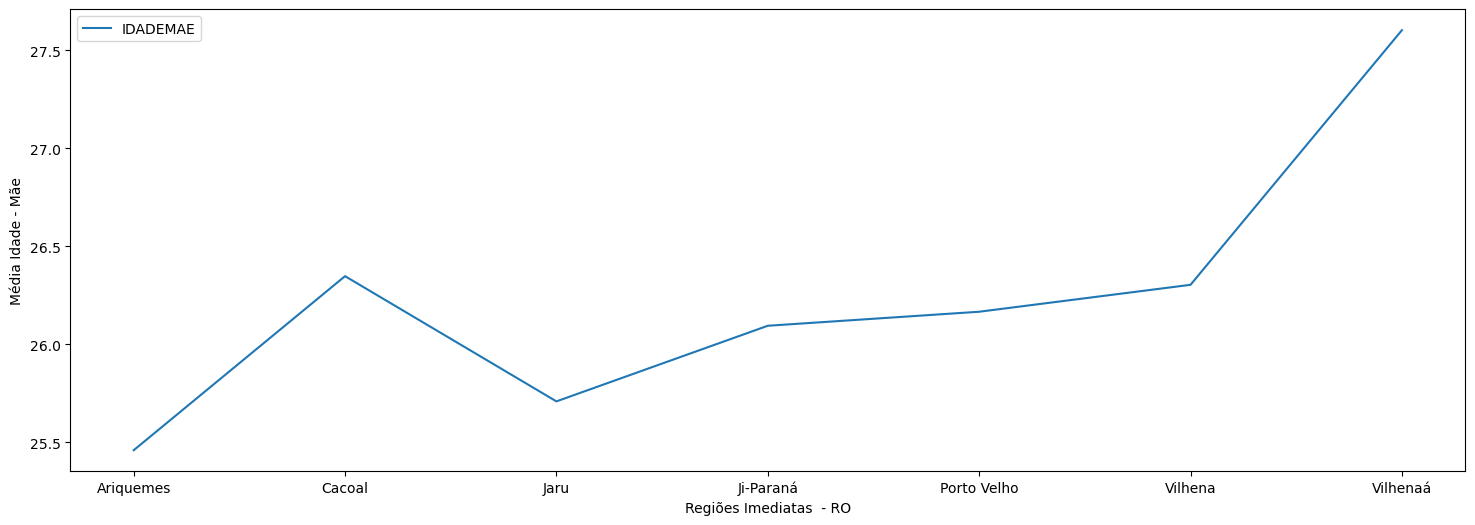

In [28]:
resultado_4.plot(figsize=[18, 6])
plt.ylabel('Média Idade - Mãe');
plt.xlabel('Regiões Imediatas  - RO')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [29]:
idh_RO = pd.read_excel('Dados_idh_RO.xlsx')
idh_RO.head(10)

,Município,IDH,Escala IDH
0,Porto Velho,0.736,IDH-M alto
1,Vilhena,0.731,IDH-M alto
2,Cacoal,0.718,IDH-M alto
3,Ji-Paraná,0.714,IDH-M alto
4,Pimenta Bueno,0.710,IDH-M alto
5,Ariquemes,0.702,IDH-M alto
6,Rolim de Moura,0.700,IDH-M alto
7,Cerejeiras,0.692,IDH-M médio
8,Jaru,0.689,IDH-M médio
9,Colorado do Oeste,0.685,IDH-M médio


In [30]:
idh_RO_1 = idh_RO.set_index('Escala IDH')
mapping = {
    'IDH-M alto': 'Bom para Viver',
    'IDH-M médio': 'Melhorar Condições',
    'IDH-M baixo': 'Rever políticas públicas',
}
idh_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1464388115.py:7: FutureWarning: ['Município'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  idh_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


IDH                                         \
                              mean median     sum    min    max       std   
Escala IDH                                                                  
Bom para Viver            0.715857  0.714   5.011  0.700  0.736  0.013668   
Melhorar Condições        0.643250  0.643  23.157  0.607  0.692  0.024046   
Rever políticas públicas  0.591333  0.592   5.322  0.584  0.598  0.004848   

                                    
                               var  
Escala IDH                          
Bom para Viver            0.000187  
Melhorar Condições        0.000578  
Rever políticas públicas  0.000023

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [35]:
ifdm_RO = pd.read_excel('Dados_ifdm_RO.xlsx')
ifdm_RO.head(10)

,Municípios,IFDM,Escala IFDM - Anual
0,Ariquemes,0.7746,Desenvolvimento moderado
1,Vilhena,0.7465,Desenvolvimento moderado
2,Pimenta Bueno,0.7383,Desenvolvimento moderado
3,Porto Velho,0.7257,Desenvolvimento moderado
4,Ji-Paraná,0.7117,Desenvolvimento moderado
5,Cacoal,0.7111,Desenvolvimento moderado
6,Santa Luzia d'Oeste,0.6850,Desenvolvimento moderado
7,Rolim de Moura,0.6785,Desenvolvimento moderado
8,Chupinguaia,0.6766,Desenvolvimento moderado
9,São Miguel do Guaporé,0.6699,Desenvolvimento moderado


In [36]:
ifdm_RO_1 = ifdm_RO.set_index('Escala IFDM - Anual')
mapping = {
    'Desenvolvimento moderado': 'Bom para Viver',
    'Desenvolvimento regular': 'Melhorar Condições',
}
ifdm_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\4142010351.py:6: FutureWarning: ['Municípios'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ifdm_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


IFDM                                              \
                         mean   median      sum     min     max       std   
Escala IFDM - Anual                                                         
Bom para Viver       0.661520  0.64730  16.5380  0.6006  0.7746  0.048779   
Melhorar Condições   0.556362  0.56415  14.4654  0.4562  0.5973  0.034401   

                               
                          var  
Escala IFDM - Anual            
Bom para Viver       0.002379  
Melhorar Condições   0.001183

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [47]:
pib_RO = pd.read_excel('Dados_pib_RO.xlsx')
pib_RO.head(10)

,Município,PIB,Analise de Valor
0,Porto Velho,17912070,Acima de 1 Bilhao
1,Ji-Paraná,3783972,Acima de 1 Bilhao
2,Vilhena,2831175,Acima de 1 Bilhao
3,Ariquemes,2579830,Acima de 1 Bilhao
4,Cacoal,2261644,Acima de 1 Bilhao
5,Jaru,1500890,Acima de 1 Bilhao
6,Rolim de Moura,1283434,Acima de 1 Bilhao
7,Pimenta Bueno,1164877,Acima de 1 Bilhao
8,Guajará-Mirim,893000,Acima de 500 Milhoes
9,Ouro Preto do Oeste,834000,Acima de 500 Milhoes


In [48]:
pib_RO_1 = pib_RO.set_index('Analise de Valor')
mapping = {
    'Acima de 1 Bilhao': 'Bom para Viver',
    'Acima de 500 Milhoes': 'Bom para Viver',
    'Acima de 100 Milhoes': 'Melhorar Condições',
    'Acima de 50 Milhoes': 'Melhorar Condições',
}
pib_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])

C:\Users\lucca\AppData\Local\Temp\ipykernel_33464\1421467647.py:8: FutureWarning: ['Município'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pib_RO_1.groupby(mapping).agg(['mean','median', 'sum', 'min', 'max', 'std', 'var'])


PIB                                        \
                            mean    median       sum     min       max   
Analise de Valor                                                         
Bom para Viver      2.307582e+06  893000.0  39228892  507000  17912070   
Melhorar Condições  2.194813e+05  174633.0   5925996  105208    496000   

                                                
                             std           var  
Analise de Valor                                
Bom para Viver      4.136029e+06  1.710674e+13  
Melhorar Condições  1.095154e+05  1.199362e+10

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.